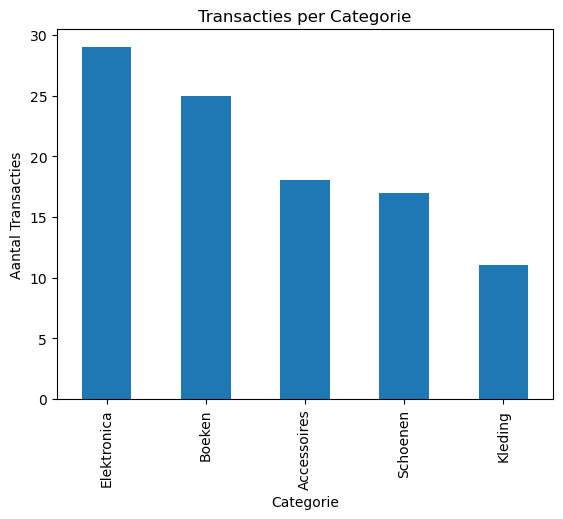

count    100.000000
mean     589.394100
std      138.400027
min      305.320000
25%      504.745000
50%      628.880000
75%      718.762500
max      816.750000
Name: Prijs, dtype: float64


In [1]:
import pandas as pd
from faker import Faker
import random
import numpy as np
import matplotlib.pyplot as plt

fake = Faker()

def generate_data(aantal_klanten, aantal_producten, aantal_transacties):
    categories = ["Elektronica", "Kleding", "Schoenen", "Accessoires", "Boeken"]

    klanten = []
    producten = []
    transacties = []

    for klant_id in range(1, aantal_klanten + 1):
        klanten.append([klant_id, fake.name(), fake.email(), fake.city(), fake.state(), fake.country()])

    klanten_df = pd.DataFrame(klanten, columns=["Klant_ID", "Naam", "E-mailadres", "Locatie", "State", "Country"])

    for _ in range(aantal_producten):
        categorie = random.choice(categories)
        productnaam = fake.word() if categorie == "Boeken" else fake.word_ext()
        prijs = round(max(10, np.random.normal(loc=500, scale=200)), 2)
        voorraadniveau = random.randint(0, 100)
        producten.append([productnaam, categorie, prijs, voorraadniveau])

    producten_df = pd.DataFrame(producten, columns=["Productnaam", "Categorie", "Prijs", "Voorraadniveau"])

    for transactie_id in range(1, aantal_transacties + 1):
        klant_id = random.choice(klanten_df['Klant_ID'])
        product = random.choice(producten_df['Productnaam'])
        product_info = producten_df[producten_df['Productnaam'] == product]
        categorie, prijs, shipmode = product_info.iloc[0, 1], product_info.iloc[0, 2], random.choice(["Express", "Standard", "Next-Day", "2-Day"])
        datum = fake.date_time_between(start_date='-1y', end_date='now')
        transacties.append([transactie_id, klant_id, product, categorie, prijs, shipmode, datum])

    transacties_df = pd.DataFrame(transacties, columns=["Transactie_ID", "Klant_ID", "Product", "Categorie", "Prijs", 'shipmode', "Datum/Tijd"])
    transacties_df['Datum/Tijd'] = pd.to_datetime(transacties_df['Datum/Tijd'])

    return klanten_df, producten_df, transacties_df

def plot_and_analyze_data(data, x_label, y_label, title):
    data['Categorie'].value_counts().plot(kind='bar', x=x_label, y=y_label)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

    summary_stats = data['Prijs'].describe()
    return summary_stats

def validate_and_save_data(data, bestandsnaam):
    cleaned_data = data.drop_duplicates()
    cleaned_data.to_csv(bestandsnaam, index=False)

aantal_transacties = 100
aantal_klanten = 50
aantal_producten = 20

klanten_df, producten_df, transacties_df = generate_data(aantal_klanten, aantal_producten, aantal_transacties)

plot_and_analyze_data(transacties_df, "Categorie", "Aantal Transacties", "Transacties per Categorie")

validate_and_save_data(transacties_df, "transacties_data.csv")
validate_and_save_data(klanten_df, "klanten_data.csv")
validate_and_save_data(producten_df, "producten_data.csv")
